In [1]:
import cv2
import matplotlib.pyplot as plt
import glob
import pathlib

In [29]:
rpis = ['h2r1', 'h2r2', 'h2r3', 'h2r4']
methods = ['ilastik', 'optical_flow', 'region_growing', 'thresholding']
xor_imgs = []
n = 0

for rpi in rpis:
    annotated_masks = [cv2.imread(x) for x in sorted(glob.glob('../annotated_masks/' + rpi + '/*.jpg'))]
    names = [pathlib.Path(x).stem for x in sorted(glob.glob('../annotated_masks/' + rpi + '/*.jpg'))]
    print(rpi)
    for method in methods:
        print(method)
        found_masks = [cv2.imread(x) for x in sorted(glob.glob('../a_found_masks/' + method + '/' + rpi + '/*.jpg'))]
        for annotated_mask, found_mask, name in zip(annotated_masks, found_masks, names):
            if annotated_mask.shape != found_mask.shape:
                found_mask = cv2.resize(found_mask, (0,0), fx=2, fy=2)
            xor_img = (~cv2.bitwise_xor(annotated_mask, found_mask))[:,:,0]
            xor_imgs.append(xor_img)
            cv2.imwrite(method + '/' + rpi + '/' + name + '.bmp', xor_img)



h2r1
ilastik
optical_flow
region_growing
thresholding
h2r2
ilastik
optical_flow
region_growing
thresholding
h2r3
ilastik
optical_flow
region_growing
thresholding
h2r4
ilastik
optical_flow
region_growing
thresholding


# No need to rerun the cells above if you already have the xor_imgs

## mask meaning: 
### if pixels are the same -> correct, pixel value in xor_img = 255
### if pixels are different -> incorrect, pixel value in xor_img = 0

In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import pathlib
import pandas as pd
import string

(2592, 4608)
0


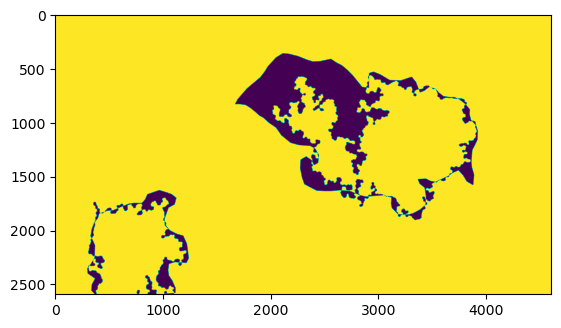

In [2]:
img = cv2.imread('ilastik/h2r1/hive2_rpi1_240419-194501Z.bmp')[:,:,0]
plt.imshow(img)
print(img.shape)
print(img[500][2000])

In [52]:
rpis = ['h2r1', 'h2r2', 'h2r3', 'h2r4']
methods = ['ilastik', 'optical_flow', 'region_growing', 'thresholding']
dfs = []

# df = pd.DataFrame()

for rpi in rpis:
    if rpi == 'h2r1': name = 'hive2_rpi1_'
    if rpi == 'h2r2': name = 'hive2_rpi2_'
    if rpi == 'h2r3': name = 'hive2_rpi3_'
    if rpi == 'h2r4': name = 'hive2_rpi4_'
    names = [((pathlib.Path(x).stem).replace(name ,'')).replace('Z', '') for x in sorted(glob.glob('ilastik/' + rpi + '/*.bmp'))]
    df = pd.DataFrame()
    df.index = names
    df.index.name = rpi
    for method in methods:
        accuracies = []
        xor_imgs = [cv2.imread(x) for x in sorted(glob.glob(method + '/' + rpi + '/*.bmp'))]
        for xor_img in xor_imgs:
            correct_pixels = np.count_nonzero(xor_img[:,:,0] == 255)
            total_pixels = xor_img.shape[0] * xor_img.shape[1]
            accuracy = round((correct_pixels / total_pixels), 4)*100
            accuracies.append(accuracy)
        df[method] = accuracies
    df.to_csv('accuracies/' + df.index.name + '_accuracies.csv')
    dfs.append(df)


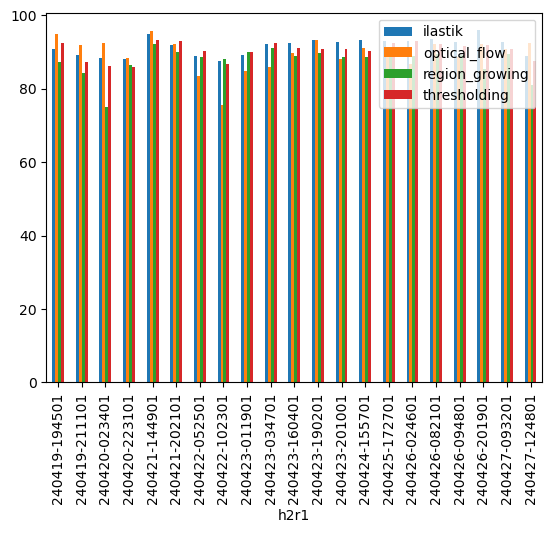

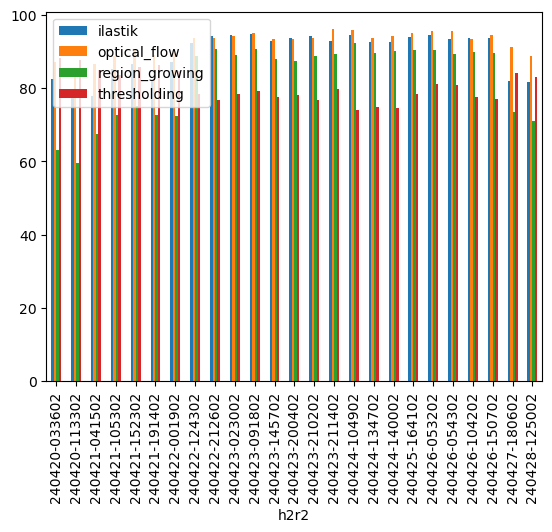

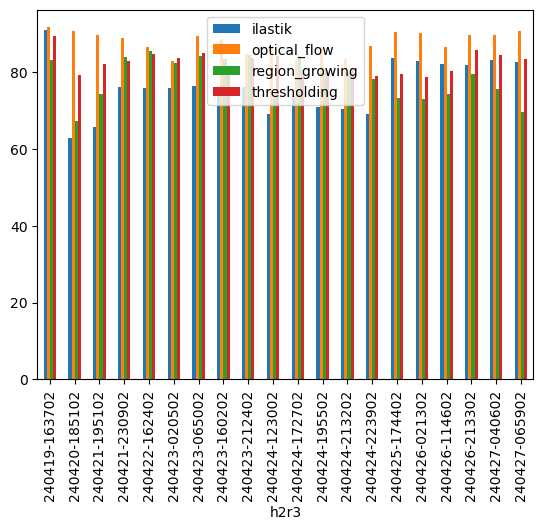

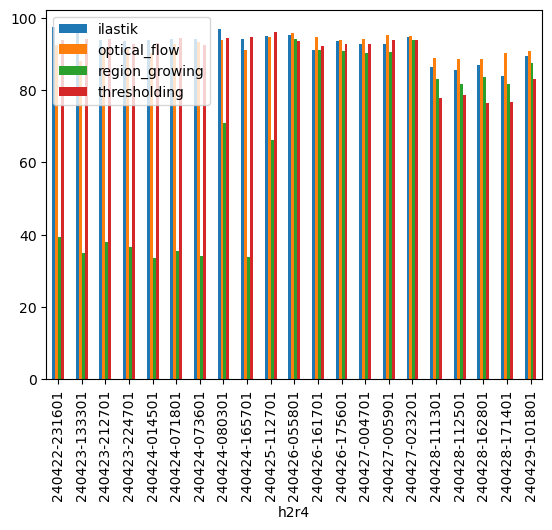

In [53]:
for df in dfs:
    df.plot.bar()